In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading & Preprocessing

In [3]:
# Display all columns when printing DataFrame
pd.set_option('display.max_columns', None)
covid19_df = pd.read_csv("country_wise_latest.csv")

In [4]:
covid19_df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [6]:
covid19_df.isna().sum() #no missing values

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [46]:
# Create new columns for Death Rate & Recovery Rate (in percentage)
covid19_df["Death Rate"] = (covid19_df["Deaths"] / covid19_df["Confirmed"] * 100).round(2)
covid19_df["Recovery Rate"] = (covid19_df["Recovered"] / covid19_df["Confirmed"] * 100).round(2)

# Drop unnecessary column
#covid19_df.drop(columns=["Deaths / 100 Recovered"], inplace=True)

# Rename columns for clarity
covid19_df.rename(columns={"Country/Region": "Country", "WHO Region": "Region"}, inplace=True)

covid19_df.head()

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Recovered / 100 Cases,Confirmed last week,1 week change,1 week % increase,Region,Death Rate,Recovery Rate
0,Afghanistan,36263,1269,25198,9796,106,10,18,69.49,35526,737,2.07,Eastern Mediterranean,3.50,69.49
1,Albania,4880,144,2745,1991,117,6,63,56.25,4171,709,17.00,Europe,2.95,56.25
2,Algeria,27973,1163,18837,7973,616,8,749,67.34,23691,4282,18.07,Africa,4.16,67.34
3,Andorra,907,52,803,52,10,0,0,88.53,884,23,2.60,Europe,5.73,88.53
4,Angola,950,41,242,667,18,1,0,25.47,749,201,26.84,Africa,4.32,25.47


# Exploratory Data Analysis (EDA) & Visualizations

In [96]:
# Identify the top 10 most affected countries based on Confirmed, Deaths, and Recoveries
covid19_df_top10 = covid19_df.sort_values(by=["Confirmed", "Deaths", "Recovered"], ascending=False).head(10)
# Transform the data for visualization (Melting for Seaborn)
melted_df = covid19_df_top10.melt(id_vars="Country", value_vars=["Confirmed", "Deaths", "Recovered"], var_name="Category", value_name="Count")
melted_df.head()

,Country,Category,Count
0,US,Confirmed,4290259
1,Brazil,Confirmed,2442375
2,India,Confirmed,1480073
3,Russia,Confirmed,816680
4,South Africa,Confirmed,452529


## Bar Chart: Top 10 Most Affected Countries

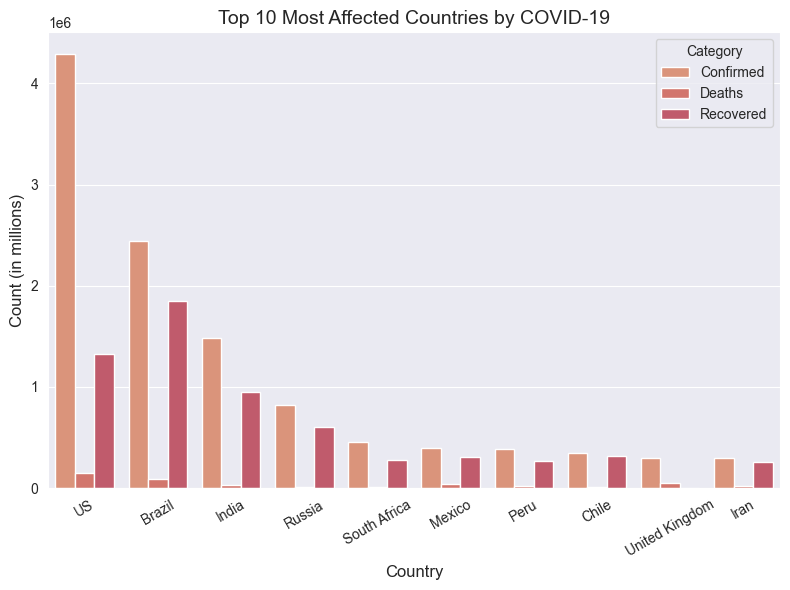

In [97]:
sns.set_style("darkgrid")
sns.set_palette("flare")
plt.figure(figsize=(8,6), dpi=100)
sns.barplot(x="Country", y="Count", data=melted_df, hue="Category")
plt.xticks(rotation=30)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Count (in millions)", fontsize=12)
plt.title("Top 10 Most Affected Countries by COVID-19", fontsize=14)
plt.legend(title="Category")
plt.tight_layout()
plt.savefig('plots/plot1.png')
plt.show()

## Scatter Plot: Recovery Rate vs Death Rate

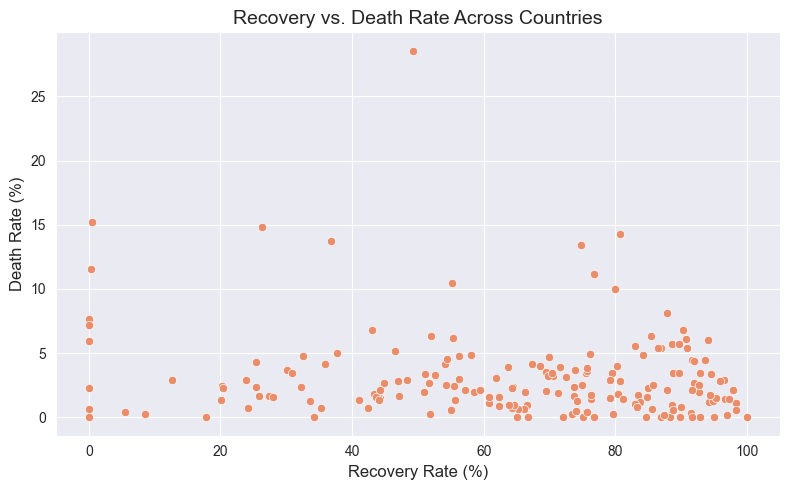

In [87]:
plt.figure(figsize=(8,5), dpi=100)
sns.scatterplot(data=covid19_df, x="Recovery Rate", y="Death Rate")
plt.xlabel("Recovery Rate (%)", fontsize=12)
plt.ylabel("Death Rate (%)", fontsize=12)
plt.title("Recovery vs. Death Rate Across Countries", fontsize=14)
plt.tight_layout()
plt.savefig('plots/plot2.png')
plt.show()

## Pie Chart: Confirmed Cases Per Region

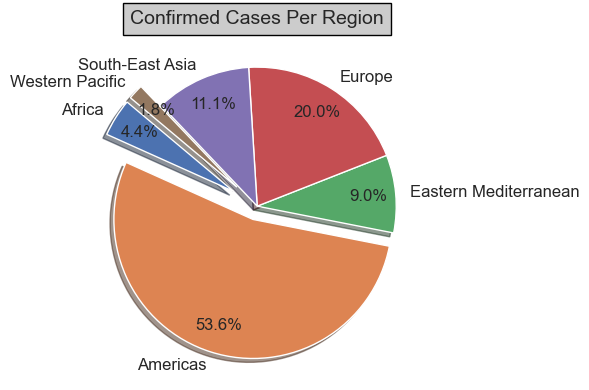

In [100]:
confirmed_cases_per_region = covid19_df.groupby("Region")["Confirmed"].sum()
pie_values = confirmed_cases_per_region.values.tolist()
pie_labels = confirmed_cases_per_region.index.values.tolist()
explode = (0.2, 0.1, 0, 0, 0, 0.2) 
sns.set_palette("deep")

plt.figure(figsize=(8,4), dpi=100)
plt.pie(pie_values, labels=pie_labels, autopct="%1.1f%%", pctdistance=0.8, startangle=140, explode=explode, shadow=True, textprops={'fontsize': 12})
plt.title("Confirmed Cases Per Region", fontsize=14, bbox={'facecolor':'0.8','pad':5, 'edgecolor': 'black', 'linewidth': 1})
plt.tight_layout()
plt.savefig('plots/plot3.png')
plt.show()


## Histogram: Weekly Increase in COVID-19 Cases

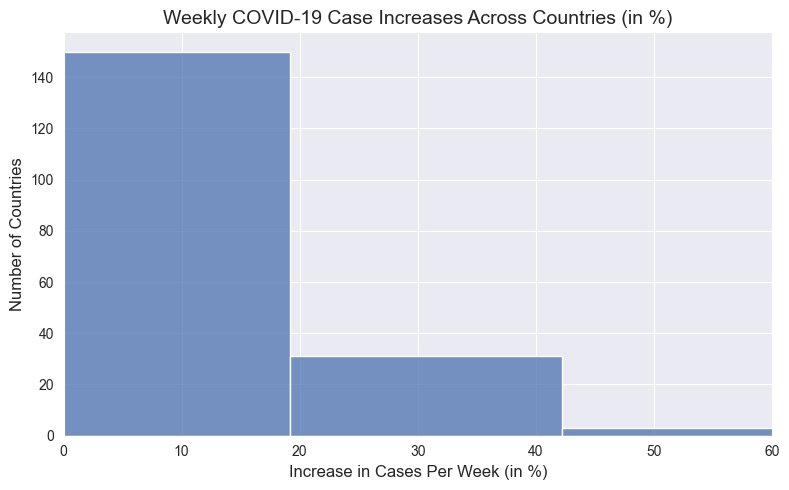

In [94]:
plt.figure(figsize=(8,5), dpi=100)
sns.histplot(covid19_df["1 week % increase"], bins=10)
plt.xlim(0, 60)
plt.xlabel("Increase in Cases Per Week (in %)", fontsize=12)
plt.ylabel("Number of Countries", fontsize=12)
plt.title("Weekly COVID-19 Case Increases Across Countries (in %)", fontsize=14)
plt.tight_layout()
plt.savefig('plots/plot4.png')
plt.show()

## Correlation Heatmap

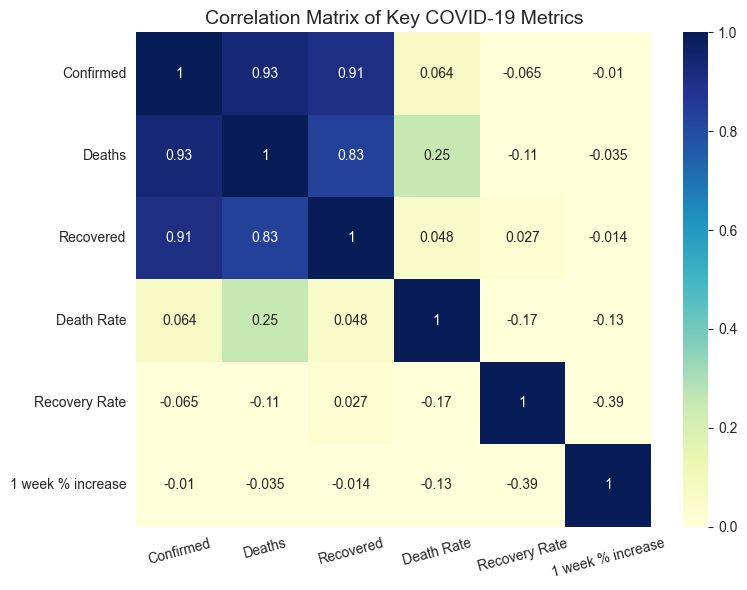

In [104]:
df_corr = covid19_df[["Confirmed", "Deaths", "Recovered", "Death Rate", "Recovery Rate", "1 week % increase"]]
plt.figure(figsize=(8,6), dpi=100)
sns.heatmap(df_corr.corr(), annot=True, vmax=1, vmin=0, cmap='YlGnBu')
plt.xticks(rotation=15)
plt.title("Correlation Matrix of Key COVID-19 Metrics", fontsize=14)
plt.tight_layout()
plt.savefig('plots/plot5.png')
plt.show()

## Line Plot: COVID-19 Trends Across Regions

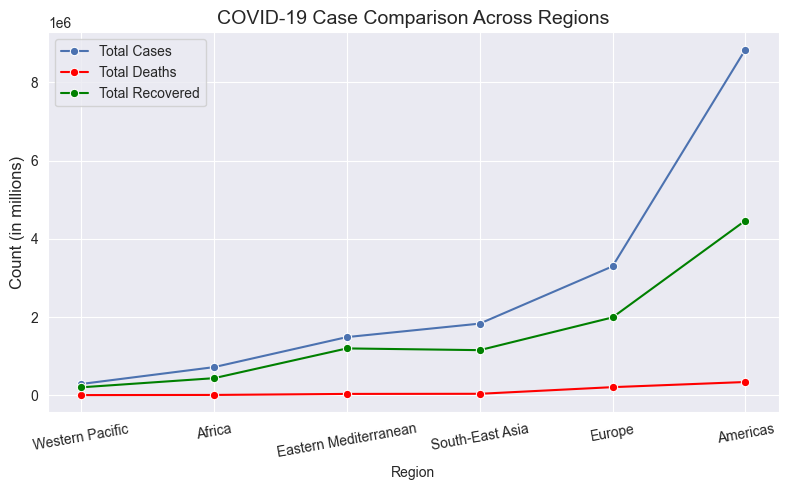

In [95]:
grouped_region_df = covid19_df.groupby("Region", as_index=False)[["Confirmed", "Deaths", "Recovered"]].sum().sort_values(by="Confirmed")

plt.figure(figsize=(8, 5), dpi=100)
sns.lineplot(data=grouped_region_df, x="Region", y="Confirmed", marker="o", label="Total Cases")
sns.lineplot(data=grouped_region_df, x="Region", y="Deaths", marker="o", label="Total Deaths", color="red")
sns.lineplot(data=grouped_region_df, x="Region", y="Recovered", marker="o", label="Total Recovered", color="green")

plt.xticks(rotation=10)
plt.ylabel("Count (in millions)", fontsize=12)
plt.title("COVID-19 Case Comparison Across Regions", fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig('plots/plot6.png')
plt.show()

# Insights & Report


## Key Findings:
- European countries had a higher death rate, while African countries had lower confirmed cases but higher 1-week growth rates.
- The majority of confirmed cases are concentrated in a few key regions.
- Higher recovery rates correlate with lower death rates, indicating effective healthcare responses.
- Many countries experience weekly case increases under 20%, but a few exceed 40%.
- Strong correlation between confirmed cases and deaths suggests severe outbreaks lead to higher fatalities.


## Limitations:
- Possible underreporting in some countries may affect data accuracy.
- Differences in healthcare infrastructure and testing rates can skew recovery and death rate statistics.


## Recommendations:
- Countries with high weekly increases should implement stricter control measures.
- Improve data collection to reduce underreporting and enhance pandemic response.
- Invest in healthcare systems, especially in regions with high case-fatality rates.
